In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme()
import matplotlib.pyplot as plt

# Mass shootings polarization data

data_mass_shootings = {
    "Date": [
        "2015-07-16",
        "2015-10-01",
        "2015-11-27",
        "2015-12-02",
        # "2016-02-20",
        "2016-06-12",
        "2016-07-07",
        "2016-07-17",
        "2016-09-16",
        "2017-01-06",
        "2017-04-18",
        "2017-06-14",
        "2017-10-01",
        "2017-11-01",
        "2017-11-05",
        "2018-02-14",
        "2018-04-22",
        "2018-05-18",
        "2018-06-28",
        "2018-10-27",
        "2018-11-07",
    ],
    "Event": [
        "Chattanooga",
        "Roseburg",
        "Colorado Springs",
        "San Bernardino",
        # "Kalamazoo",
        "Orlando Nightclub",
        "Dallas Police",
        "Baton Rouge Police",
        "Burlington",
        "Fort Lauderdale Airport",
        "Fresno",
        "San Francisco Cafe",
        "Vegas",
        "Thornton Walmart",
        "Sutherland Springs Church",
        "Parkland School",
        "Nashville Waffle House",
        "Santa Fe High School",
        "Annapolis Journal",
        "Pittsburgh Synagogue",
        "Thousand Oaks Bar",
    ],
    "Polarization": [
        0.5159,
        0.5139,
        0.5113,
        0.5045,
        # 0.5038,
        0.5084,
        0.5058,
        0.5059,
        0.5283,
        0.4995,
        0.5215,
        0.5075,
        0.5074,
        0.5051,
        0.5163,
        0.5049,
        0.5023,
        0.5040,
        0.5087,
        0.5080,
        0.5101,
    ],
    "Random": [
        0.5064,
        0.5017,
        0.5000,
        0.4986,
        # 0.4574,
        0.4999,
        0.5004,
        0.4969,
        0.4986,
        0.4905,
        0.4952,
        0.4998,
        0.5003,
        0.5001,
        0.5000,
        0.5002,
        0.5004,
        0.4983,
        0.5002,
        0.5003,
        0.4981,
    ],
    "Number of users": [
        216,
        148,
        4306,
        1863,
        # 33,
        5980,
        2677,
        275,
        441,
        147,
        204,
        1457,
        7563,
        3119,
        360,
        3487,
        539,
        320,
        198,
        874,
        83,
    ],
}

df_mass_shootings = pd.DataFrame(data_mass_shootings)

# Convert date from string to datetime
df_mass_shootings["Date"] = pd.to_datetime(df_mass_shootings["Date"])
df_mass_shootings["Timestamp"] = df_mass_shootings["Date"].apply(lambda x: x.timestamp())


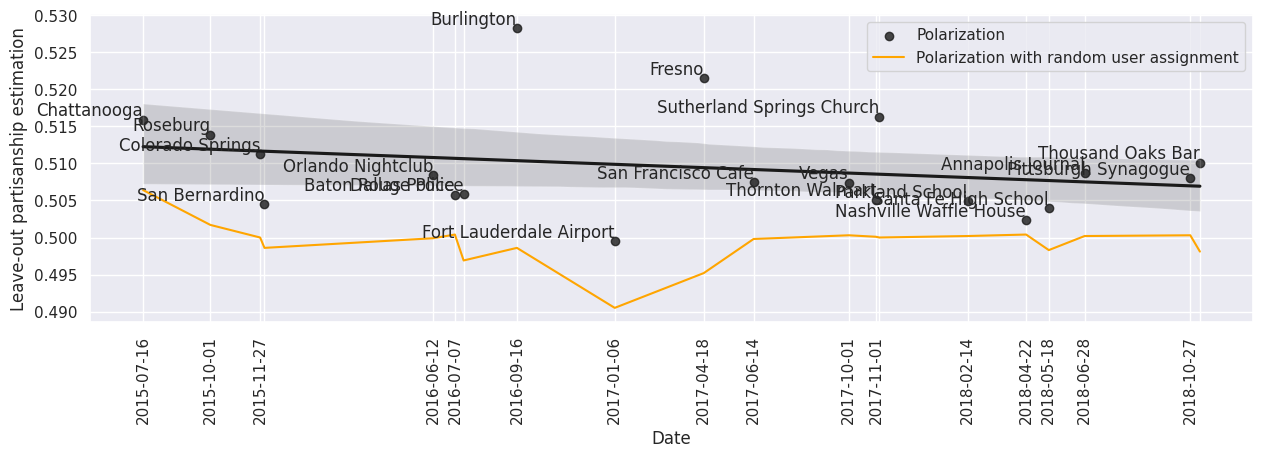

In [2]:
plt.figure(figsize=(15, 4))
sns.regplot(
    data=df_mass_shootings,
    x="Timestamp",
    y="Polarization",
    marker="o",
    color="k",
    label="Polarization",
)

for i, row in df_mass_shootings.iterrows():
    plt.text(
        row["Timestamp"],
        row["Polarization"],
        row["Event"],
        horizontalalignment="right",
        verticalalignment="bottom",
    )
sns.lineplot(
    data=df_mass_shootings,
    x="Timestamp",
    y="Random",
    label="Polarization with random user assignment",
    color="orange",
)
# display timestamp as date
plt.xticks(
    df_mass_shootings["Timestamp"],
    [
        date if i not in (3, 6, 13, 19) else ""
        for i, date in enumerate(df_mass_shootings["Date"].dt.date)
    ],
    rotation=90,
)

plt.xlabel("Date")
plt.ylabel("Leave-out partisanship estimation")
plt.show()


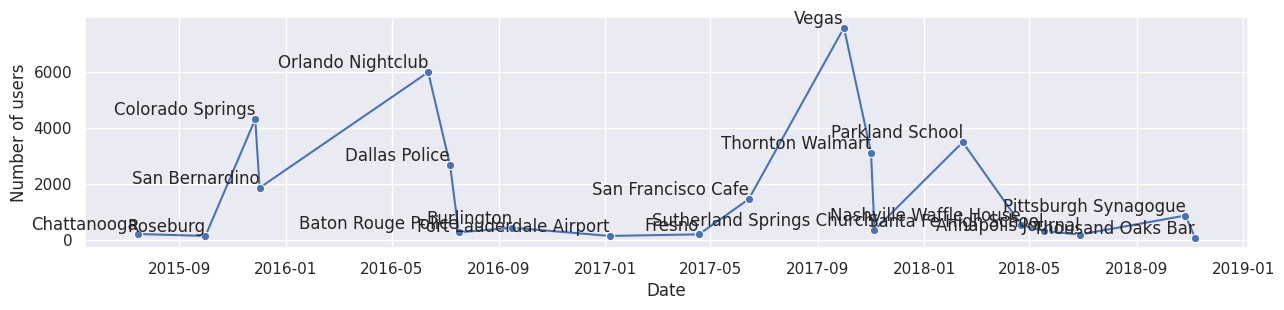

In [10]:
plt.figure(figsize=(15, 3))
sns.lineplot(data=df_mass_shootings, x="Date", y="Number of users", marker="o")

for i, row in df_mass_shootings.iterrows():
    plt.text(
        row["Date"],
        row["Number of users"],
        row["Event"],
        horizontalalignment="right",
        verticalalignment="bottom",
    )

plt.show()

In [4]:
data_gun_control = {
    "Date": ["2015-06-17", "2015-07-16", "2015-10-01", "2015-11-27", "2015-12-02", "2016-02-20", "2016-06-12", "2016-07-07", 
             "2016-07-17", "2016-09-16", "2017-01-06", "2017-04-18", "2017-06-14", "2017-10-01", "2017-11-01", "2017-11-05",
             "2018-02-14", "2018-04-22", "2018-05-18", "2018-06-28", "2018-10-27", "2018-11-07"],
    "Event": ["Charleston Church", "Chattanooga", "Roseburg", "Colorado Springs", "San Bernardino", "Kalamazoo", 
              "Orlando Nightclub", "Dallas Police", "Baton Rouge Police", "Burlington", "Fort Lauderdale Airport", 
              "Fresno", "San Francisco Cafe", "Las Vegas", "Thornton Walmart", "Sutherland Springs Church", 
              "Parkland School", "Nashville Waffle House", "Santa Fe High School", "Annapolis Journal", 
              "Pittsburgh Synagogue", "Thousand Oaks Bar"],
    "Polarization": [0.5179, 0.5162, 0.5223, 0.5150, 0.5151, 0.5294, 0.5293, 0.5252, 0.5226, 0.5186, 0.5183, 
                     0.5189, 0.5156, 0.5159, 0.5156, 0.5148, 0.5129, 0.5139, 0.5129, 0.5139, 0.5124, 0.5128],
    "Random": [0.5000, 0.5000, 0.5002, 0.4999, 0.4997, 0.4999, 0.5000, 0.5002, 0.5000, 0.5000, 0.4999, 0.4999, 
               0.5000, 0.5000, 0.5001, 0.5001, 0.5001, 0.5000, 0.4999, 0.5000, 0.5001, 0.5000],
    "Number of users": [19423, 21126, 29736, 24806, 25110, 64845, 64597, 56063, 76514, 64378, 80051, 75677, 76493, 
              79063, 81348, 79348, 94575, 83970, 84693, 93024, 117111, 115416]
}


df_gun_control = pd.DataFrame(data_gun_control)

# Convert date from string to datetime
df_gun_control["Date"] = pd.to_datetime(df_gun_control["Date"])
df_gun_control["Timestamp"] = df_gun_control["Date"].apply(lambda x: x.timestamp())

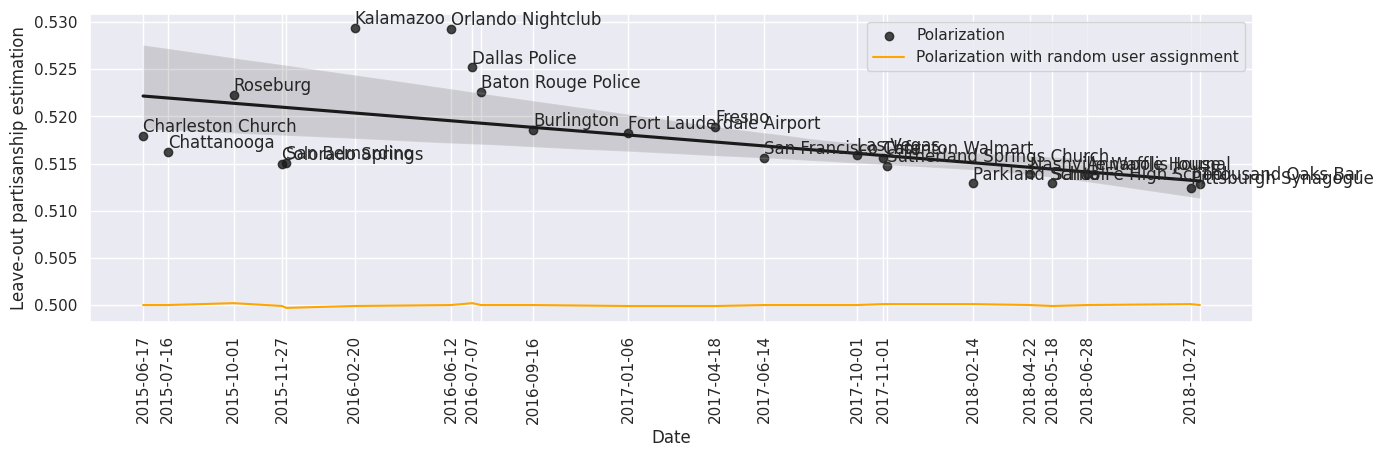

In [5]:
plt.figure(figsize=(15, 4))
sns.regplot(
    data=df_gun_control,
    x="Timestamp",
    y="Polarization",
    marker="o",
    color="k",
    label="Polarization",
)
sns.lineplot(
    data=df_gun_control,
    x="Timestamp",
    y="Random",
    label="Polarization with random user assignment",
    color="orange",
)
for i, row in df_gun_control.iterrows():
    plt.text(
        row["Timestamp"],
        row["Polarization"],
        row["Event"],
        horizontalalignment="left",
        verticalalignment="bottom",
    )
# display timestamp as date
plt.xticks(
    df_gun_control["Timestamp"],
    [
        date if i not in (4, 8, 15, 21) else ""
        for i, date in enumerate(df_gun_control["Date"].dt.date)
    ],
    rotation=90,
)

plt.xlabel("Date")
plt.ylabel("Leave-out partisanship estimation")
plt.show()
